# Pandas

In [379]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import pyodbc
pd.set_option('display.float_format', '{:.0f}'.format)
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)

## <span style="color:red">Pandas Data Structures</span>

### <span style="color:orange">Series</span>
- one Dimensional labeled array capable of holiding any data type.

#### <span style="color:orange">DataFrame</span>
- A two dimensional,size-mutable, heterogeneous tabular data structure with labeld axes (rows and columns)

### <span style="color:red">Pandas use cases</span>
- Data Cleaning and Preparation.
   - Missing Data
   - Data Transformation
- EDA
   - Descriptive Statistics
   - Data Visulization
- Feature Engineering
   - Creation of New Features
   - Transformation Techniques
   - Time Series Analysis
- ML Work Flow
   - Data Pre-proccessing
   - pipeline Integration
   - Visualization of Model Results.

## <span style="color:red">Pandas Data Structures</span>
- Understanding pandas core Data Structures is fundamental to effectively manipulating and analyzing data.The primary adat structures are
   - Series
   - DataFrame

### <span style="color:orange">Series</span>
- one Dimensional labeled array capable of holiding any data type (integers,floats,string etc).
- It similar to a one dimensional NumPy Array but comes with additional functionalities like custom indexing

#### Craeting Series

In [2]:
# from list
l = [10,20,30,40]
s = pd.Series([l])
s

0    [10, 20, 30, 40]
dtype: object

In [4]:
# from dict
d = {'a':1,'b':2,'c':3}
s = pd.Series(d)
s

a    1
b    2
c    3
dtype: int64

In [6]:
# Accessing Data
# s. values -> Returns values of the series
print(s.values)

[1 2 3]


In [8]:
# Index
# s.index -> Returns index label
print(s.index)

Index(['a', 'b', 'c'], dtype='object')


In [10]:
# Basic Operations
s2 = s*2
s2

a    2
b    4
c    6
dtype: int64

### Indexing and slicing and Arithmetic Operations

In [13]:
s = pd.Series([1,2,3,4],index=['a','b','c','d'])
s

a    1
b    2
c    3
d    4
dtype: int64

In [17]:
# Label based indexing
print(s[0])

1


In [18]:
print(s[3])

4


In [20]:
# position based indexing
print(s.iloc[0])

1


In [21]:
print(s.iloc[3])

4


In [22]:
print(s.loc['a'])

1


In [23]:
# Slicing
# Label Slicing
print(s['a':'c'])

a    1
b    2
c    3
dtype: int64


In [24]:
s.iloc[1:3]

b    2
c    3
dtype: int64

### <span style="color:orange">DataFrame</span>
- A DataFrame is a two dimensional, size is mutable, and heterogeneous tabular data structure with labeled axes ( rows and columns).
- It is a one of the most used structures in Pandas for data manipulation and analysis.

#### Creating DataFrame from various Sources

In [25]:
# From list
l = [[1,2,3],[4,5,6]]
df = pd.DataFrame(l,columns=['a','b','c'])
df

,a,b,c
0,1,2,3
1,4,5,6


In [29]:
# From dict
d = {'Id':[1,2,3,4],
    'Name': ['Ashok','Baby','ChowReddy','Deepik'],
    'Marks':[90,95,97,93]}
df = pd.DataFrame(d)
df

,Id,Name,Marks
0,1,Ashok,90
1,2,Baby,95
2,3,ChowReddy,97
3,4,Deepik,93


In [141]:
# From csv
df = pd.read_csv('financial data.csv')
df.head()

,CustomerID,Monthly_Income,Loan_Amount,Credit_Score,Transaction_Amount
0,1,54967.14153,269967.7718,616.241086,1046.096221
1,2,48617.35699,246231.6841,642.774067,1569.807495
2,3,56476.88538,202981.5185,610.379004,1793.197233
3,4,65230.29856,167653.1611,634.601923,2943.843829
4,5,47658.46625,234911.1657,555.319267,2278.276562


### <span style="color:red">Setting Indexes</span>
- Set one or more columns as the DataFrame index row label. which can make accessing data more efficient.

In [61]:
df = pd.read_csv('SampleSuperstore.csv')
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [43]:
df1 = df.copy()
df1.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [42]:
df1.set_index(keys=['State'],append=True,drop=False,inplace=True)
df1.head()
# append = True Set the keys as additional index levels rather than replacing the current index.
# drop (default True): Removes those columns from the DataFrame.

,,,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
,State,State,,,,,,,,,,,,,
0,Kentucky,Kentucky,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Kentucky,Kentucky,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,California,California,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Florida,Florida,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Florida,Florida,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [46]:
# Multi-level (hierarchical) index:
df1.set_index(keys=['Ship Mode','State','Region'],inplace=True)
df1.head()

Segment        Country             City  \
Ship Mode      State      Region                                              
Second Class   Kentucky   South    Consumer  United States        Henderson   
                          South    Consumer  United States        Henderson   
               California West    Corporate  United States      Los Angeles   
Standard Class Florida    South    Consumer  United States  Fort Lauderdale   
                          South    Consumer  United States  Fort Lauderdale   

                                  Postal Code         Category Sub-Category  \
Ship Mode      State      Region                                              
Second Class   Kentucky   South         42420        Furniture    Bookcases   
                          South         42420        Furniture       Chairs   
               California West          90036  Office Supplies       Labels   
Standard Class Florida    South         33311        Furniture       Tables   
                          South         33311  Office Supplies      Storage   

                                     Sales  Quantity  Discount    Profit  
Ship Mode      State      Region                                          
Second Class   Kentucky   South   261.9600         2      0.00   41.9136  
                          South   731.9400         3      0.00  219.5820  
               California West     14.6200         2      0.00    6.8714  
Standard Class Florida    South   957.5775         5      0.45 -383.0310  
                          South    22.3680         2      0.20    2.5164

### <span style="color:red">Resetting Indexes</span>

In [49]:
df1.reset_index(inplace=True)
df1.head()

,Ship Mode,State,Region,Segment,Country,City,Postal Code,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Kentucky,South,Consumer,United States,Henderson,42420,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Kentucky,South,Consumer,United States,Henderson,42420,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,California,West,Corporate,United States,Los Angeles,90036,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Florida,South,Consumer,United States,Fort Lauderdale,33311,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Florida,South,Consumer,United States,Fort Lauderdale,33311,Office Supplies,Storage,22.3680,2,0.20,2.5164


## <span style="color:red">Reading Data</span>

In [524]:
# from csv
df = pd.read_csv('SampleSuperstore.csv',sep=',',header=0,)
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,Date
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.96,2,0.00,41.91,3-Jun-23
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.94,3,0.00,219.58,3-Sep-24
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.62,2,0.00,6.87,8-Mar-23
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.58,5,0.45,-383.03,31-May-24
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.37,2,0.20,2.52,22-Mar-23


In [54]:
# Frox XL
df_xl = pd.read_excel('State_Master.xlsx',sheet_name='State_Name')
df_xl.head()

,State_Code,State_Name
0,ST01,Andhra Pradesh
1,ST02,Arunachal Pradesh
2,ST03,Assam
3,ST04,Bihar
4,ST05,Chhattisgarh


In [56]:
# from json
df_json = pd.read_json('cars.json')
df_json.head()

,year,model,price,mileage,color,transmission
0,2011,SEL,21992,7413,Yellow,AUTO
1,2011,SEL,20995,10926,Gray,AUTO
2,2011,SEL,19995,7351,Silver,AUTO
3,2011,SEL,17809,11613,Gray,AUTO
4,2012,SE,17500,8367,White,AUTO


In [59]:
# from sql
conn_str = (
    "Driver={ODBC Driver 17 for SQL Server};"
    "Server=RAMACHANDRA\\SQLEXPRESS;"
    "Database=AdventureWorks_Sales;"
    "Trusted_Connection=yes;"
)

conn = pyodbc.connect(conn_str)
df = pd.read_sql("select * from dbo.Product_data", conn)

df.head()

,ProductKey,SKU,Product,Standard_Cost,Color,List_Price,Model,Subcategory,Category
0,210,FR-R92B-58,"HL Road Frame - Black, 58",868.63,Black,1431.50,HL Road Frame,Road Frames,Components
1,211,FR-R92R-58,"HL Road Frame - Red, 58",868.63,Red,1431.50,HL Road Frame,Road Frames,Components
2,212,HL-U509-R,"Sport-100 Helmet, Red",12.03,Red,33.64,Sport-100,Helmets,Accessories
3,213,HL-U509-R,"Sport-100 Helmet, Red",13.88,Red,33.64,Sport-100,Helmets,Accessories
4,214,HL-U509-R,"Sport-100 Helmet, Red",13.09,Red,34.99,Sport-100,Helmets,Accessories


# <span style="color:red">Data Inspection</span>

In [64]:
# to find size of the data frame which means number of rows and number of columns
df.shape

(9994, 13)

In [62]:
# df.head() it will by difault 1st 5 rows.
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [63]:
# df.head() it will 1st 7 rows.
df.head(7)

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
5,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Furniture,Furnishings,48.8600,7,0.00,14.1694
6,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Art,7.2800,4,0.00,1.9656


In [65]:
# df.tail() by default it will displaay last 5 rows
df.tail()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.248,3,0.2,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.960,2,0.0,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.576,2,0.2,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.600,4,0.0,13.3200
9993,Second Class,Consumer,United States,Westminster,California,92683,West,Office Supplies,Appliances,243.160,2,0.0,72.9480


In [66]:
# df.tail() it will displaay last 4 rows
df.tail(4)

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.960,2,0.0,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.576,2,0.2,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.600,4,0.0,13.3200
9993,Second Class,Consumer,United States,Westminster,California,92683,West,Office Supplies,Appliances,243.160,2,0.0,72.9480


In [67]:
df.sample() # if we want random row in the dataframe we are using sample. by default it will display only one rows

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
523,First Class,Consumer,United States,Los Angeles,California,90032,West,Technology,Phones,55.176,3,0.2,-12.4146


In [69]:
df.sample(5) # It will display rando, 5 rows

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
7881,Second Class,Consumer,United States,Thornton,Colorado,80229,West,Technology,Accessories,76.752,6,0.2,10.5534
9033,Standard Class,Consumer,United States,Fayetteville,Arkansas,72701,South,Office Supplies,Binders,1793.980,2,0.0,843.1706
8735,Second Class,Corporate,United States,New York City,New York,10024,East,Office Supplies,Storage,64.960,4,0.0,9.7440
7998,First Class,Corporate,United States,Seattle,Washington,98105,West,Furniture,Furnishings,12.180,7,0.0,3.8976
3601,Standard Class,Consumer,United States,Philadelphia,Pennsylvania,19143,East,Office Supplies,Paper,12.448,2,0.2,3.8900


In [70]:
df.info() # Data type and memory usage and null values anf data type. it will give information of the dataframe.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [72]:
# To select categorical columns
col_df = df.select_dtypes('object')
col_df.nunique() # Number of unique values per column

Ship Mode         4
Segment           3
Country           1
City            531
State            49
Region            4
Category          3
Sub-Category     17
dtype: int64

In [73]:
df.count() # Non-null count per column

Ship Mode       9994
Segment         9994
Country         9994
City            9994
State           9994
Postal Code     9994
Region          9994
Category        9994
Sub-Category    9994
Sales           9994
Quantity        9994
Discount        9994
Profit          9994
dtype: int64

In [74]:
# Descriptive statistics include those that summarize the central tendency, dispersion and shape of a dataset's distribution, excluding ``NaN`` values.
# By default it will give numeric values
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [76]:
# For Categorical columns
df.describe(exclude=['float64','int64'])

,Ship Mode,Segment,Country,City,State,Region,Category,Sub-Category
count,9994,9994,9994,9994,9994,9994,9994,9994
unique,4,3,1,531,49,4,3,17
top,Standard Class,Consumer,United States,New York City,California,West,Office Supplies,Binders
freq,5968,5191,9994,915,2001,3203,6026,1523


# <span style="color:red">Data Types and Memory</span>

In [77]:
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [88]:
df.dtypes

Ship Mode        object
Segment          object
Country          object
City             object
State            object
Postal Code       int64
Region           object
Category         object
Sub-Category     object
Sales           float64
Quantity          int64
Discount        float64
Profit          float64
Date             object
dtype: object

In [79]:
# select only categorical columns
df_cat = df.select_dtypes(include=['object'])
df_cat.head()

,Ship Mode,Segment,Country,City,State,Region,Category,Sub-Category
0,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Bookcases
1,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Chairs
2,Second Class,Corporate,United States,Los Angeles,California,West,Office Supplies,Labels
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Furniture,Tables
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Office Supplies,Storage


In [81]:
# select only numeric columns
df_num = df.select_dtypes(include=['int64','float64'])
df_num.head()

,Postal Code,Sales,Quantity,Discount,Profit
0,42420,261.9600,2,0.00,41.9136
1,42420,731.9400,3,0.00,219.5820
2,90036,14.6200,2,0.00,6.8714
3,33311,957.5775,5,0.45,-383.0310
4,33311,22.3680,2,0.20,2.5164


# <span style="color:red">Convert data types</span>

In [82]:
df['Postal Code'] = df['Postal Code'].astype('int64')

In [83]:
df['Profit'] = df['Profit'].astype('float64')

In [84]:
df['Segment'] = df['Segment'].astype('object')

In [87]:
df['Discount']= pd.to_numeric(df['Discount'],errors='coerce')

In [89]:
df['Date'] = pd.to_datetime(df['Date'])

In [91]:
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')

In [92]:
df.dtypes

Ship Mode               object
Segment                 object
Country                 object
City                    object
State                   object
Postal Code              int64
Region                  object
Category                object
Sub-Category            object
Sales                  float64
Quantity                 int64
Discount               float64
Profit                 float64
Date            datetime64[ns]
dtype: object

# <span style="color:red">Data Selection and Indexing</span>

In [95]:
# to select single column
df['Country'].head()

0    United States
1    United States
2    United States
3    United States
4    United States
Name: Country, dtype: object

In [96]:
# To select mUltiple columns
df_mul = df[['State','Region','Sales']]
df_mul.head()

,State,Region,Sales
0,Kentucky,South,261.9600
1,Kentucky,South,731.9400
2,California,West,14.6200
3,Florida,South,957.5775
4,Florida,South,22.3680


In [97]:
# Column operations
df.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit', 'Date'],
      dtype='object')

In [100]:
df.columns = [i.lower() for i in df.columns.tolist()]# Get column names as list and coverting lower case.
df.columns

Index(['ship mode', 'segment', 'country', 'city', 'state', 'postal code',
       'region', 'category', 'sub-category', 'sales', 'quantity', 'discount',
       'profit', 'date'],
      dtype='object')

In [108]:
# I want to select all rows and Shipmode and segment sales by using loc method
df.loc[:, ['ship mode', 'segment', 'sales']].head()

,ship mode,segment,sales
0,Second Class,Consumer,261.9600
1,Second Class,Consumer,731.9400
2,Second Class,Corporate,14.6200
3,Standard Class,Consumer,957.5775
4,Standard Class,Consumer,22.3680


In [117]:
# I want to select all rows and columns from category to discount
df.loc[:,'category':'sales'].head()

,category,sub-category,sales
0,Furniture,Bookcases,261.9600
1,Furniture,Chairs,731.9400
2,Office Supplies,Labels,14.6200
3,Furniture,Tables,957.5775
4,Office Supplies,Storage,22.3680


In [119]:
df2 = df.copy()
df2.set_index('region',inplace=True)
df2.head()

,ship mode,segment,country,city,state,postal code,category,sub-category,sales,quantity,discount,profit,date
region,,,,,,,,,,,,,
South,Second Class,Consumer,United States,Henderson,Kentucky,42420,Furniture,Bookcases,261.9600,2,0.00,41.9136,2023-06-03
South,Second Class,Consumer,United States,Henderson,Kentucky,42420,Furniture,Chairs,731.9400,3,0.00,219.5820,2024-09-03
West,Second Class,Corporate,United States,Los Angeles,California,90036,Office Supplies,Labels,14.6200,2,0.00,6.8714,2023-03-08
South,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,Furniture,Tables,957.5775,5,0.45,-383.0310,2024-05-31
South,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,Office Supplies,Storage,22.3680,2,0.20,2.5164,2023-03-22


In [125]:
# to select south region
df2.loc['South','category':'date'].head()

,category,sub-category,sales,quantity,discount,profit,date
region,,,,,,,
South,Furniture,Bookcases,261.9600,2,0.00,41.9136,2023-06-03
South,Furniture,Chairs,731.9400,3,0.00,219.5820,2024-09-03
South,Furniture,Tables,957.5775,5,0.45,-383.0310,2024-05-31
South,Office Supplies,Storage,22.3680,2,0.20,2.5164,2023-03-22
South,Office Supplies,Paper,15.5520,3,0.20,5.4432,2024-07-17


In [150]:
df.loc[df['Sales']>1000,['Category','Date','Sales']].head()

,Category,Date,Sales
10,Furniture,18-Jun-25,1706.184
24,Furniture,4-Jan-25,1044.630
27,Furniture,1-Oct-24,3083.430
35,Technology,22-Jun-23,1097.544
54,Technology,5-Mar-23,1029.950


In [126]:
df.iloc[0] #1st row

ship mode              Second Class
segment                    Consumer
country               United States
city                      Henderson
state                      Kentucky
postal code                   42420
region                        South
category                  Furniture
sub-category              Bookcases
sales                        261.96
quantity                          2
discount                        0.0
profit                      41.9136
date            2023-06-03 00:00:00
Name: 0, dtype: object

In [145]:
df.iloc[:3] # 1st three rows

,CustomerID,Monthly_Income,Loan_Amount,Credit_Score,Transaction_Amount
0,1,54967.14153,269967.7718,616.241086,1046.096221
1,2,48617.35699,246231.6841,642.774067,1569.807495
2,3,56476.88538,202981.5185,610.379004,1793.197233


In [132]:
df.iloc[-1] #last row

ship mode              Second Class
segment                    Consumer
country               United States
city                    Westminster
state                    California
postal code                   92683
region                         West
category            Office Supplies
sub-category             Appliances
sales                        243.16
quantity                          2
discount                        0.0
profit                       72.948
date            2023-04-27 00:00:00
Name: 9993, dtype: object

In [133]:
df.iloc[:,[1,3,5]].head()

,segment,city,postal code
0,Consumer,Henderson,42420
1,Consumer,Henderson,42420
2,Corporate,Los Angeles,90036
3,Consumer,Fort Lauderdale,33311
4,Consumer,Fort Lauderdale,33311


In [134]:
df.iloc[2:7,[3,4,5]].head()

,city,state,postal code
2,Los Angeles,California,90036
3,Fort Lauderdale,Florida,33311
4,Fort Lauderdale,Florida,33311
5,Los Angeles,California,90032
6,Los Angeles,California,90032


In [136]:
df.iloc[:,-1].head() # to select lost column.

0   2023-06-03
1   2024-09-03
2   2023-03-08
3   2024-05-31
4   2023-03-22
Name: date, dtype: datetime64[ns]

In [153]:
# Single condition
df[df['Sales']>1500].head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,Date
10,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Furniture,Tables,1706.184,9,0.2,85.3092,18-Jun-25
27,Standard Class,Consumer,United States,Philadelphia,Pennsylvania,19140,East,Furniture,Bookcases,3083.430,7,0.5,-1665.0522,1-Oct-24
149,Standard Class,Corporate,United States,Franklin,Wisconsin,53132,Central,Furniture,Chairs,1951.840,8,0.0,585.5520,20-Mar-25
165,Standard Class,Consumer,United States,San Antonio,Texas,78207,Central,Technology,Machines,8159.952,8,0.4,-1359.9920,2-Nov-23
167,Standard Class,Consumer,United States,San Antonio,Texas,78207,Central,Furniture,Chairs,1740.060,9,0.3,-24.8580,20-Oct-24


In [154]:
df[df['Region'] == 'South'].head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,Date
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136,3-Jun-23
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820,3-Sep-24
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310,31-May-24
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164,22-Mar-23
12,Standard Class,Consumer,United States,Concord,North Carolina,28027,South,Office Supplies,Paper,15.5520,3,0.20,5.4432,17-Jul-24


In [158]:
df_col = df[df['Region'].isin(['South','West'])]
df_col['Region'].value_counts()

Region
West     3203
South    1620
Name: count, dtype: int64

In [159]:
df_cat = df[df['Category'].isin(['Furniture','Office Supplies'])]
df_cat['Category'].value_counts()

Category
Office Supplies    6026
Furniture          2121
Name: count, dtype: int64

In [165]:
# Multiple conditions
df[(df['State'] == 'Kentucky') & (df['Quantity'] > 5)].head(3)

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,Date
846,Standard Class,Consumer,United States,Louisville,Kentucky,40214,South,Technology,Phones,83.72,7,0.0,23.4416,29-Oct-23
999,Standard Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Furnishings,33.11,7,0.0,12.9129,3-Nov-24
2324,Second Class,Corporate,United States,Henderson,Kentucky,42420,South,Office Supplies,Binders,364.80,12,0.0,167.8080,8-Apr-23


In [164]:
df[(df['Category']=='Technology') &(df['Quantity']>12)].head(3)

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,Date
251,Standard Class,Consumer,United States,San Diego,California,92037,West,Technology,Accessories,3347.370,13,0.0,636.0003,14-May-23
2582,Standard Class,Home Office,United States,Alexandria,Virginia,22304,South,Technology,Phones,155.350,13,0.0,0.0000,15-Mar-23
2793,Standard Class,Corporate,United States,Redondo Beach,California,90278,West,Technology,Phones,1075.088,14,0.2,94.0702,13-Apr-25


In [167]:
df[(df['Segment']=='Consumer') | (df['Quantity']>=15)].head(2)

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,Date
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.96,2,0.0,41.9136,3-Jun-23
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.94,3,0.0,219.5820,3-Sep-24


In [174]:
# NOT condition
df[~(df['Country']=='United States')].head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,Date


In [184]:
# Query method
df.query(" Country == 'United States' and Sales >= 1000 ").head(2)

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,Date
10,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Furniture,Tables,1706.184,9,0.2,85.3092,18-Jun-25
24,Standard Class,Consumer,United States,Orem,Utah,84057,West,Furniture,Tables,1044.630,3,0.0,240.2649,4-Jan-25


In [190]:
df.query("Region == 'West' and Quantity > 10 ").head(2)

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,Date
139,Standard Class,Consumer,United States,Roseville,California,95661,West,Furniture,Furnishings,43.12,14,0.0,20.6976,4-Sep-24
251,Standard Class,Consumer,United States,San Diego,California,92037,West,Technology,Accessories,3347.37,13,0.0,636.0003,14-May-23


# <span style="color:red">Data Cleaning</span>

In [313]:
data = {
    "ID": [1, 2, 3, 4, 5, 6, 7],
    "Name": ["Alice", "Bob", None, "David", "Eva", "Frank", None],
    "Age": [25, None, 30, 45, None, 29, 33],
    "Join_Date": ["2023-01-10", None, "2023-03-15", "2024-05-20", None, "2025-07-11", "2025-08-01"],
    "Department": ["HR", "IT", "Finance", None, "IT", "HR", None],
    "Salary": [50000, 60000, None, 80000, 75000, None, 72000],
    'Sales':[100, np.nan, np.nan, 200, np.nan, 300, np.nan]
}

df = pd.DataFrame(data)
df

,ID,Name,Age,Join_Date,Department,Salary,Sales
0,1,Alice,25.0,2023-01-10,HR,50000.0,100.0
1,2,Bob,NaN,None,IT,60000.0,NaN
2,3,None,30.0,2023-03-15,Finance,NaN,NaN
3,4,David,45.0,2024-05-20,None,80000.0,200.0
4,5,Eva,NaN,None,IT,75000.0,NaN
5,6,Frank,29.0,2025-07-11,HR,NaN,300.0
6,7,None,33.0,2025-08-01,None,72000.0,NaN


### Detect missing data

In [193]:
df.isnull() # if the values are available it will return False and values are not available it will return True

,ID,Name,Age,Join_Date,Department,Salary
0,False,False,False,False,False,False
1,False,False,True,True,False,False
2,False,True,False,False,False,True
3,False,False,False,False,True,False
4,False,False,True,True,False,False
5,False,False,False,False,False,True
6,False,True,False,False,True,False


In [253]:
df.isna()

,ID,Name,Age,Join_Date,Department,Salary,Sales
0,False,False,False,False,False,False,False
1,False,False,True,True,False,False,True
2,False,True,False,False,False,True,True
3,False,False,False,False,True,False,False
4,False,False,True,True,False,False,True
5,False,False,False,False,False,True,False
6,False,True,False,False,True,False,True


In [195]:
df.notnull() # if the values are available it will return True otherwise it will return false.

,ID,Name,Age,Join_Date,Department,Salary
0,True,True,True,True,True,True
1,True,True,False,False,True,True
2,True,False,True,True,True,False
3,True,True,True,True,False,True
4,True,True,False,False,True,True
5,True,True,True,True,True,False
6,True,False,True,True,False,True


In [196]:
df.isnull().sum() # Count of null values per column

ID            0
Name          2
Age           2
Join_Date     2
Department    2
Salary        2
dtype: int64

In [197]:
df.isnull().any() # Columns with any null values

ID            False
Name           True
Age            True
Join_Date      True
Department     True
Salary         True
dtype: bool

### Handle missing data

In [199]:
df.dropna() # Drop rows with any null values

,ID,Name,Age,Join_Date,Department,Salary
0,1,Alice,25.0,2023-01-10,HR,50000.0


In [201]:
df.dropna(axis=1) # It will drop columns if any null value is available

,ID
0,1
1,2
2,3
3,4
4,5
5,6
6,7


In [204]:
df.dropna(subset=['Age']) ## Drop rows with null in specific column

,ID,Name,Age,Join_Date,Department,Salary
0,1,Alice,25.0,2023-01-10,HR,50000.0
2,3,None,30.0,2023-03-15,Finance,NaN
3,4,David,45.0,2024-05-20,None,80000.0
5,6,Frank,29.0,2025-07-11,HR,NaN
6,7,None,33.0,2025-08-01,None,72000.0


In [212]:
df.dropna(thresh=2,inplace=True) ## Drop rows with less than 2 non-null values

### filling missing value

In [219]:
df.fillna(0) # Filling with Constant value.

,ID,Name,Age,Join_Date,Department,Salary
0,1,Alice,25.0,2023-01-10 00:00:00,HR,50000.0
1,2,Bob,0.0,0,IT,60000.0
2,3,0,30.0,2023-03-15 00:00:00,Finance,0.0
3,4,David,45.0,2024-05-20 00:00:00,0,80000.0
4,5,Eva,0.0,0,IT,75000.0
5,6,Frank,29.0,2025-07-11 00:00:00,HR,0.0
6,7,0,33.0,2025-08-01 00:00:00,0,72000.0


In [242]:
print(df['Salary'].skew())

-0.7200090598001077


### 👉 Interpretation:
- 0 = perfectly symmetric (like Normal distribution)
- '> 0 = right-skewed (tail on the right)
- < 0 = left-skewed (tail on the left)

### ✅ 3. Decide imputation method
- If right-skewed → use **median**
- If left-skewed → also **median** (more robust than mean)
- If approximately normal → **mean** is fine
- If strong skewness & many missing values → consider log transform or KNN imputer

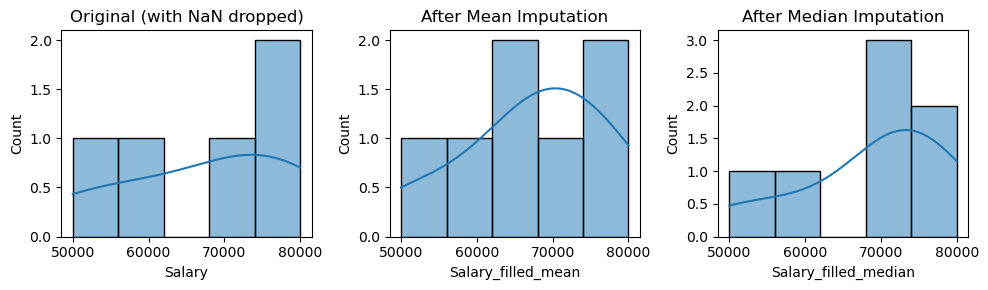

(np.float64(-0.7200090598001077),
 np.float64(-0.7407350188103557),
 np.float64(-1.18915141426365))

In [248]:
# Fill missing values with mean and median
df['Salary_filled_mean'] = df['Salary'].fillna(df['Salary'].mean())
df['Salary_filled_median'] = df['Salary'].fillna(df['Salary'].median())

# Plot original vs mean vs median filled
plt.figure(figsize=(10,3))

# Original
plt.subplot(1,3,1)
sns.histplot(df['Salary'].dropna(), kde=True, bins=5)
plt.title("Original (with NaN dropped)")

# Mean filled
plt.subplot(1,3,2)
sns.histplot(df['Salary_filled_mean'], kde=True, bins=5)
plt.title("After Mean Imputation")

# Median filled
plt.subplot(1,3,3)
sns.histplot(df['Salary_filled_median'], kde=True, bins=5)
plt.title("After Median Imputation")

plt.tight_layout()
plt.show()

# Skewness comparison
skew_original = df['Salary'].skew()
skew_mean = df['Salary_filled_mean'].skew()
skew_median = df['Salary_filled_median'].skew()

(skew_original, skew_mean, skew_median)


- When your data is left-skewed (negatively skewed), the mean is pulled to the right (higher), while the **median** stays closer to the center of the bulk of the data.
- **Avoid** **Mean** imputation → not ideal, because outliers in right-skewed data will make the mean too high, biasing results

In [232]:
df['Salary'] = df['Salary'].fillna(df['Salary'].median())

In [314]:
# for Categirical data use mode
df['Department'] = df['Department'].fillna(df['Department'].mode()[0])
df['Name'] = df['Name'].fillna(df['Name'].mode()[0])

### ffill and bfill

In [255]:
df['Sales_ffill'] = df['Sales'].fillna(method='ffill')

In [257]:
df['Sales_bfill'] = df['Sales'].fillna(method='bfill')

### interpolate

In [267]:
df['Linear'] = df['Sales'].interpolate(method='linear')
df['Polynomial'] = df['Sales'].interpolate(method='polynomial', order=2)

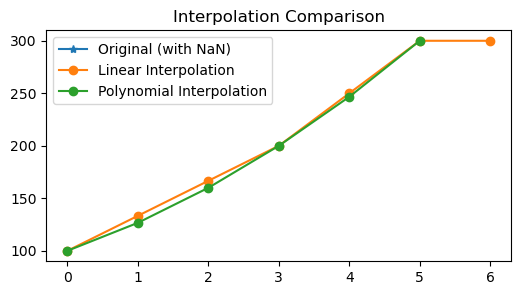

In [277]:
# Plot comparison
plt.figure(figsize=(6,3))
plt.plot(df['Sales'], marker='*', label='Original (with NaN)')
plt.plot(df['Linear'], marker='o', label='Linear Interpolation')
plt.plot(df['Polynomial'], marker='o', label='Polynomial Interpolation')
plt.legend()
plt.title("Interpolation Comparison")
plt.show()

| Method           | How It Works                                           | Best For                             | Pros                                   | Cons                                           |
|-----------------|--------------------------------------------------------|-------------------------------------|----------------------------------------|-----------------------------------------------|
| **Mean Fill**    | Replaces missing values with the **average** of the column | Numerical data with no strong trends | Simple, easy to implement              | Ignores trends; can distort data if data is skewed |
| **Median Fill**  | Replaces missing values with the **median** (middle value) | Numerical data, especially with outliers | Robust to outliers                     | Still ignores trends and patterns             |
| **Interpolation**| Estimates missing values by **connecting the dots** between existing data points (linear, polynomial, etc.) | Continuous, time-series, or ordered data | Preserves trend and smoothness         | Can be misleading if data has sudden jumps or non-linear patterns |


# <span style="color:red">Duplicate Data</span>

### Detect Duplicate Data

In [303]:
df.duplicated() # Boolean Series of duplicate rows

0    False
1    False
2    False
3    False
4    False
5    False
6    False
dtype: bool

In [302]:
df.duplicated(subset=['Department'])  # Check duplicates in specific column

0    False
1    False
2    False
3     True
4     True
5     True
6     True
dtype: bool

In [304]:
df.duplicated(subset=['Department']).sum() # Count of duplicate rows

np.int64(4)

### Handiling Duplicate Data

In [306]:
df.drop_duplicates() # Remove duplicate rows

,ID,Name,Age,Join_Date,Department,Salary,Sales
0,1,Alice,25.0,2023-01-10,HR,50000.0,100.0
1,2,Bob,NaN,None,IT,60000.0,NaN
2,3,Alice,30.0,2023-03-15,Finance,NaN,NaN
3,4,David,45.0,2024-05-20,HR,80000.0,200.0
4,5,Eva,NaN,None,IT,75000.0,NaN
5,6,Frank,29.0,2025-07-11,HR,NaN,300.0
6,7,Alice,33.0,2025-08-01,HR,72000.0,NaN


In [311]:
df.drop_duplicates(subset=['Department'],keep='first')# Keep first occurrence

,ID,Name,Age,Join_Date,Department,Salary,Sales
0,1,Alice,25.0,2023-01-10,HR,50000.0,100.0
1,2,Bob,NaN,None,IT,60000.0,NaN
2,3,Alice,30.0,2023-03-15,Finance,NaN,NaN


In [315]:
df.drop_duplicates(subset=['Department'],keep='last')# Keep first occurrence

,ID,Name,Age,Join_Date,Department,Salary,Sales
2,3,Alice,30.0,2023-03-15,Finance,NaN,NaN
4,5,Eva,NaN,None,IT,75000.0,NaN
6,7,Alice,33.0,2025-08-01,HR,72000.0,NaN


# <span style="color:red">String Operations</span>

In [316]:
# Common string operations
df['Department_l'] = df['Department'].str.lower() # Convert to lowercase
df['Department_u'] = df['Department'].str.upper() # Convert to uppercase
df['Department_t'] = df['Department'].str.title() # Title case
df['Department_s'] = df['Department'].str.strip() # Remove whitespace

In [323]:
df['Department_l']= df['Department_l'].str.replace('it', 'IT') # Replace strings

In [324]:
df

,ID,Name,Age,Join_Date,Department,Salary,Sales,Department_l,Department_u,Department_t,Department_s
0,1,Alice,25.0,2023-01-10,HR,50000.0,100.0,hr,HR,Hr,HR
1,2,Bob,NaN,None,IT,60000.0,NaN,IT,IT,It,IT
2,3,Alice,30.0,2023-03-15,Finance,NaN,NaN,finance,FINANCE,Finance,Finance
3,4,David,45.0,2024-05-20,HR,80000.0,200.0,hr,HR,Hr,HR
4,5,Eva,NaN,None,IT,75000.0,NaN,IT,IT,It,IT
5,6,Frank,29.0,2025-07-11,HR,NaN,300.0,hr,HR,Hr,HR
6,7,Alice,33.0,2025-08-01,HR,72000.0,NaN,hr,HR,Hr,HR


# <span style="color:red">Data Transformation</span>

In [325]:
# droping columns
df.drop(columns=['Department_l','Department_u','Department_t','Department_s'],inplace=True)

In [326]:
df.head()

,ID,Name,Age,Join_Date,Department,Salary,Sales
0,1,Alice,25.0,2023-01-10,HR,50000.0,100.0
1,2,Bob,NaN,None,IT,60000.0,NaN
2,3,Alice,30.0,2023-03-15,Finance,NaN,NaN
3,4,David,45.0,2024-05-20,HR,80000.0,200.0
4,5,Eva,NaN,None,IT,75000.0,NaN


In [328]:
df = pd.read_csv('SampleSuperstore.csv')
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,Date
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136,3-Jun-23
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820,3-Sep-24
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714,8-Mar-23
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310,31-May-24
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164,22-Mar-23


In [329]:
df['Sales'].max()

22638.48

In [356]:
df_greatethan_1500 = df.loc[df['Sales']>10000,['Category','Ship Mode','Sales']]
df_greatethan_1500

,Category,Ship Mode,Sales
2623,Technology,First Class,11199.968
2697,Technology,Standard Class,22638.480
4190,Technology,Standard Class,10499.970
6826,Technology,Standard Class,17499.950
8153,Technology,First Class,13999.960


In [354]:
df_greatethan_1500['Sales_inc'] = df_greatethan_1500['Sales'].apply(lambda x:x*0.1 if x>17000 else None)
df_greatethan_1500['Sales_inc']

2623         NaN
2697    2263.848
4190         NaN
6826    1749.995
8153         NaN
Name: Sales_inc, dtype: float64

In [357]:
df_greatethan_1500.loc[:, 'Sales_inc'] = df_greatethan_1500['Sales'].apply(lambda x: x*0.1 if x>17000 else None)

In [358]:
df_greatethan_1500

,Category,Ship Mode,Sales,Sales_inc
2623,Technology,First Class,11199.968,NaN
2697,Technology,Standard Class,22638.480,2263.848
4190,Technology,Standard Class,10499.970,NaN
6826,Technology,Standard Class,17499.950,1749.995
8153,Technology,First Class,13999.960,NaN


In [361]:
df_greatethan_1500['Sales_inc'] = df_greatethan_1500['Sales_inc'].fillna(0)

In [363]:
df_greatethan_1500['Total Sales'] = df_greatethan_1500['Sales']+df_greatethan_1500['Sales_inc']

In [364]:
df_greatethan_1500

,Category,Ship Mode,Sales,Sales_inc,Total Sales
2623,Technology,First Class,11199.968,0.000,11199.968
2697,Technology,Standard Class,22638.480,2263.848,24902.328
4190,Technology,Standard Class,10499.970,0.000,10499.970
6826,Technology,Standard Class,17499.950,1749.995,19249.945
8153,Technology,First Class,13999.960,0.000,13999.960


In [370]:
df['Sales Cate'] = df['Sales'].apply(lambda x: 'high' if x > 17000 else ('medium' if x > 10000 else 'low'))

# <span style="color:red">Groupby</span>

### Total Sales by Segment wise 

In [380]:
# Basic Group
df.groupby('Segment')['Sales'].sum()

Segment
Consumer      1161401
Corporate      706146
Home Office    429653
Name: Sales, dtype: float64

### Max Sales by Segment wise 

In [384]:
df.groupby('Segment')['Sales'].max()

Segment
Consumer      14000
Corporate     17500
Home Office   22638
Name: Sales, dtype: float64

### Min Sales by Segment wise 

In [385]:
df.groupby('Segment')['Sales'].min()

Segment
Consumer      0
Corporate     1
Home Office   1
Name: Sales, dtype: float64

### Count of customers in each segment

In [387]:
df.groupby('Segment')['Sales'].count()

Segment
Consumer       5191
Corporate      3020
Home Office    1783
Name: Sales, dtype: int64

In [388]:
df.groupby('Segment')['Sales'].size()

Segment
Consumer       5191
Corporate      3020
Home Office    1783
Name: Sales, dtype: int64

### Total Sales, min,max,average sales by segment

In [391]:
df.groupby('Segment')['Sales'].agg(['sum','min','max','mean']).reset_index()

,Segment,sum,min,max,mean
0,Consumer,1161401,0,14000,224
1,Corporate,706146,1,17500,234
2,Home Office,429653,1,22638,241


### Total Sales, min,average sales by segment with column names

In [395]:
#Multiple aggregations on one column
df.groupby('Region')['Sales'].agg(Min_sales = 'min',
                                    Total_sales = 'sum',
                                    max_sales = 'max').reset_index()

,Region,Min_sales,Total_sales,max_sales
0,Central,0,501240,17500
1,East,1,678781,11200
2,South,1,391722,22638
3,West,1,725458,14000


### Total Sales by Region.

In [398]:
# Total sales by region
df.groupby('Region')['Sales'].sum().reset_index()

,Region,Sales
0,Central,501240
1,East,678781
2,South,391722
3,West,725458


### Avg Profit by Segment

In [401]:
# Average profit by segment
df.groupby('Segment')['Profit'].agg(Average_profit='mean').reset_index()

,Segment,Average_profit
0,Consumer,26
1,Corporate,30
2,Home Office,34


### Total Sales and Average Sales and Total Profit by segment wise.

In [404]:
# Multiple aggregations on multiple columns
df.groupby('Segment').agg(
                        Total_Sales=('Sales','sum'),
                        Avg_Sales=('Sales','mean'),
                        Total_Profit=('Profit','sum')).reset_index()

,Segment,Total_Sales,Avg_Sales,Total_Profit
0,Consumer,1161401,224,134119
1,Corporate,706146,234,91979
2,Home Office,429653,241,60299


### Find the segment with the maximum profit in each region

In [406]:
df.groupby('Region').apply(lambda x: x.loc[x['Profit'].idxmax()])

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,Date,Sales Cate
Region,,,,,,,,,,,,,,,
Central,Standard Class,Corporate,United States,Lafayette,Indiana,47905,Central,Technology,Copiers,17500,5,0,8400,20-Oct-23,high
East,Standard Class,Consumer,United States,Newark,Delaware,19711,East,Technology,Copiers,10500,3,0,5040,4-Aug-25,medium
South,Standard Class,Consumer,United States,Atlanta,Georgia,30318,South,Office Supplies,Binders,6355,5,0,3177,7-Aug-25,low
West,First Class,Consumer,United States,Seattle,Washington,98115,West,Technology,Copiers,14000,4,0,6720,29-Jan-23,medium


### Group by two columns (Region + Segment)

In [407]:
# Group by two columns (Region + Segment)
df.groupby(['Region','Segment'])['Sales'].sum().reset_index()

,Region,Segment,Sales
0,Central,Consumer,252031
1,Central,Corporate,157996
2,Central,Home Office,91213
3,East,Consumer,350908
4,East,Corporate,200409
5,East,Home Office,127464
6,South,Consumer,195581
7,South,Corporate,121886
8,South,Home Office,74255
9,West,Consumer,362881


### Apply custom functions

In [408]:
df.groupby('Ship Mode').apply(lambda x: x.describe())

Postal Code  Sales  Quantity  Discount  Profit
Ship Mode                                                           
First Class    count         1538   1538      1538      1538    1538
               mean         54766    228         4         0      32
               std          32767    630         2         0     258
               min           1810      1         1         0   -2640
               25%          21215     18         2         0       2
               50%          60016     55         3         0       9
               75%          90008    200         5         0      29
               max          99207  14000        14         1    6720
Same Day       count          543    543       543       543     543
               mean         57536    236         4         0      29
               std          31334    555         2         0     227
               min           1841      1         1         0   -3840
               25%          30080     17         2         0       2
               50%          60076     55         3         0       8
               75%          90036    210         5         0      30
               max          99207   8000        14         1    2229
Second Class   count         1945   1945      1945      1945    1945
               mean         55626    236         4         0      30
               std          31966    559         2         0     153
               min           1841      1         1         0   -1862
               25%          27604     18         2         0       3
               50%          60505     58         3         0       9
               75%          90004    224         5         0      33
               max          99207   8750        14         1    2800
Standard Class count         5968   5968      5968      5968    5968
               mean         54944    228         4         0      27
               std          31975    647         2         0     250
               min           1040      0         1         0   -6600
               25%          22304     17         2         0       1
               50%          55407     53         3         0       8
               75%          90004    210         5         0      29
               max          99301  22638        14         1    8400

# <span style="color:red">Pivot Tables</span>

In [417]:
# Basic pivot table
pd.pivot_table(df,
               values='Sales',
               index='Region',
               columns='Category',
               aggfunc='sum',
               margins=True,
               margins_name='Total Sales')

Category,Furniture,Office Supplies,Technology,Total Sales
Region,,,,
Central,163797,167026,170416,501240
East,208291,205516,264974,678781
South,117299,125651,148772,391722
West,252613,220853,251992,725458
Total Sales,742000,719047,836154,2297201


In [426]:
# Multiple values and aggregations
pd.pivot_table(df,values=['Sales','Quantity'],
               index='Region',
               columns='Category',
               aggfunc={'Sales':'sum','Quantity':'max'},margins=True,margins_name='Total Sales')

Quantity                                            Sales  \
Category    Furniture Office Supplies Technology Total Sales Furniture   
Region                                                                   
Central            14              14         12          14    163797   
East               14              14         14          14    208291   
South              14              14         14          14    117299   
West               14              14         14          14    252613   
Total Sales        14              14         14          14    742000   

                                                    
Category    Office Supplies Technology Total Sales  
Region                                              
Central              167026     170416      501240  
East                 205516     264974      678781  
South                125651     148772      391722  
West                 220853     251992      725458  
Total Sales          719047     836154     2297201

In [429]:
# if we want to use filters like excel.
# 1st filter the data 
# for example i want tp put filter City == Henderson
df_fil = df[df['City']=='Henderson']
pd.pivot_table(df_fil,values='Sales',index='Region',columns='Category',aggfunc='sum')

Category,Furniture,Office Supplies,Technology
Region,,,
South,6980,4611,4070
West,1882,6,NaN


In [433]:
# if we want to use filters like excel.
# 1st filter the data 
# for example i want tp put filter City == New York City 
df_fil = df[df['City']=='New York City']
pd.pivot_table(df_fil,values='Sales',index='Region',columns='Category',aggfunc='sum')

Category,Furniture,Office Supplies,Technology
Region,,,
East,75691,71361,109316


In [434]:
# if we want to use filters like excel.
# 1st filter the data 
# for example i want tp put filter Ship Mode == Second Class 
df_ship = df[df['Ship Mode']=='Second Class']
pd.pivot_table(df_ship,values='Sales',index='Region',columns='Category',aggfunc='sum')

Category,Furniture,Office Supplies,Technology
Region,,,
Central,31187,34307,38056
East,44036,43205,29304
South,26910,30598,36250
West,54156,52573,38611


In [441]:
# Multiple index and columns.
pd.pivot_table(df,
               values='Sales',
               index=['Segment','Region'],
               columns=['Category','Sub-Category'],
               aggfunc='sum',
               margins=True,
               margins_name='Total Sales')

Category            Furniture                           Office Supplies        \
Sub-Category        Bookcases Chairs Furnishings Tables      Appliances   Art   
Segment     Region                                                              
Consumer    Central     12961  42933        9500  20835            9819  3272   
            East        27307  59645       13177  14082           19390  3847   
            South        8717  26804       10871  24409            8287  2655   
            West        19648  43480       16072  40607           15324  4478   
Corporate   Central      8390  27990        3144  12563            5225  1479   
            East        13169  23505        9983  17552           10981  2278   
            South        1154  11367        4505  12620           10124  1332   
            West        11294  36279        7369  28138           10259  3501   
Home Office Central      2807  14308        2610   5757            8539  1014   
            East         3343  13110        5911   7506            3817  1360   
            South        1029   7005        1931   6888            1114   668   
            West         5062  22022        6631  16009            4654  1234   
Total Sales            114880 328449       91705 206966          107532 27119   

Category                                                                       \
Sub-Category        Binders Envelopes Fasteners Labels Paper Storage Supplies   
Segment     Region                                                              
Consumer    Central   39694      2365       422    743  7564   24672     4560   
            East      31623      2096       424   1653  8661   24994     8568   
            South     18618      1192       276   1868  7603   16882     2124   
            West      28227      2119       558   2445 12496   33944    10490   
Corporate   Central    8880      1236       232   1095  5952   12657     4383   
            East      12048      1579       286    509  5975   30968     1849   
            South     11828      1471        81    365  3345   11362     6022   
            West      18805      1657       184   2133  8611   24804     7181   
Home Office Central    8350      1036       123    613  3976    8602      525   
            East       9827       701       110    442  5536   15650      343   
            South      6585       683       146    120  3202    7524      173   
            West       8929       343       180    501  5557   11785      456   
Total Sales          203413     16476      3024  12486 78479  223844    46674   

Category             Technology                         Total Sales  
Sub-Category        Accessories Copiers Machines Phones              
Segment     Region                                                   
Consumer    Central       19062    4520    12000  37109      252031  
            East          22861   30400    30668  51512      350908  
            South         11652    4440    18339  30846      195581  
            West          33530   30460    18536  50466      362881  
Corporate   Central        6195   29680    11717  17181      157996  
            East          11748    4220    23892  29866      200409  
            South         10175    4860    12001  19274      121886  
            West          20072    8070    12667  24833      225855  
Home Office Central        8699    3060     3081  18114       91213  
            East          10424   18600    11546  19237      127464  
            South          5450     NaN    23551   8184       74255  
            West           7512   11220    11241  23386      136722  
Total Sales              167380  149528   189239 330007     2297201

# <span style="color:red">pd.crosstab() </span>
- in pandas is used to create a cross-tabulation — basically a frequency table (like a pivot table but simpler).
- It’s very handy when you want to quickly summarize the relationship between two (or more) categorical variables.

In [446]:
# Basic crosstab
pd.crosstab(df['Ship Mode'],df['Segment'],margins=True)

Segment,Consumer,Corporate,Home Office,All
Ship Mode,,,,
First Class,769,485,284,1538
Same Day,317,114,112,543
Second Class,1020,609,316,1945
Standard Class,3085,1812,1071,5968
All,5191,3020,1783,9994


In [452]:
# With percentages
#Step 2️⃣ Normalize = True (overall % of total rows)
pd.set_option('display.float_format', '{:.2f}'.format)
pd.crosstab(df['Ship Mode'],df['Segment'],normalize=True)

Segment,Consumer,Corporate,Home Office
Ship Mode,,,
First Class,0.08,0.05,0.03
Same Day,0.03,0.01,0.01
Second Class,0.10,0.06,0.03
Standard Class,0.31,0.18,0.11


In [450]:
# With percentages
#Step 3️⃣ Normalize = 'index' (row %)
pd.set_option('display.float_format', '{:.2f}'.format)
pd.crosstab(df['Ship Mode'],df['Segment'],normalize='index')

Segment,Consumer,Corporate,Home Office
Ship Mode,,,
First Class,0.50,0.32,0.18
Same Day,0.58,0.21,0.21
Second Class,0.52,0.31,0.16
Standard Class,0.52,0.30,0.18


In [454]:
# With percentages
#Step 4️⃣ Normalize = 'columns' (column %)
pd.crosstab(df['Ship Mode'],df['Segment'],normalize='columns')

Segment,Consumer,Corporate,Home Office
Ship Mode,,,
First Class,0.15,0.16,0.16
Same Day,0.06,0.04,0.06
Second Class,0.20,0.20,0.18
Standard Class,0.59,0.60,0.60


In [456]:
# With values
pd.crosstab(df['Ship Mode'],df['Segment'],values=df['Sales'],aggfunc='sum')

Segment,Consumer,Corporate,Home Office
Ship Mode,,,
First Class,159168.96,105858.47,86400.99
Same Day,60596.36,45121.32,22645.44
Second Class,231498.95,146126.04,81568.58
Standard Class,710137.07,409040.54,239038.14


In [461]:
pd.pivot_table(df,index='Ship Mode',columns='Segment',values='Sales',aggfunc='sum')

Segment,Consumer,Corporate,Home Office
Ship Mode,,,
First Class,159168.96,105858.47,86400.99
Same Day,60596.36,45121.32,22645.44
Second Class,231498.95,146126.04,81568.58
Standard Class,710137.07,409040.54,239038.14


# <span style="color:red">Concatenation</span>

In [481]:
import pandas as pd

# Sample DataFrames for practice
df1 = pd.DataFrame({
    'ID': [1, 2, 3],
    'Name': ['Alice', 'Bob', 'Charlie'],
    'Sales': [200, 300, 400]
})

df2 = pd.DataFrame({
    'ID': [1, 2, 6],
    'Name': ['David', 'Eva', 'Frank'],
    'Sales': [500, 600, 700]
})

df3 = pd.DataFrame({
    'Region': ['East', 'West', 'South'],
    'Profit': [50, 60, 70]
})

In [463]:
df1

,ID,Name,Sales
0,1,Alice,200
1,2,Bob,300
2,3,Charlie,400


In [464]:
df2

,ID,Name,Sales
0,4,David,500
1,5,Eva,600
2,6,Frank,700


In [465]:
df3

,Region,Profit
0,East,50
1,West,60
2,South,70


In [469]:
# Row-wise concatenation (axis=0)
pd.concat([df1,df2],axis=0,ignore_index=True)

,ID,Name,Sales
0,1,Alice,200
1,2,Bob,300
2,3,Charlie,400
3,4,David,500
4,5,Eva,600
5,6,Frank,700


In [471]:
# Column-wise concatenation (axis=0)
pd.concat([df2,df3],axis=1,ignore_index=True)

,0,1,2,3,4
0,4,David,500,East,50
1,5,Eva,600,West,60
2,6,Frank,700,South,70


In [484]:
pd.concat([df1,df2],axis=0,join='inner')

,ID,Name,Sales
0,1,Alice,200
1,2,Bob,300
2,3,Charlie,400
0,1,David,500
1,2,Eva,600
2,6,Frank,700


# <span style="color:red">Merging</span>
- Merge is used to combine two DataFrames based on common column or indexes.
- It works just like SQL joins (INNER, LEFT, RIGHT, FULL OUTER JOIN)
- syntax:
  - pd.merge(left,right,how='inner',left_on=None,right_on=None)

In [499]:
df1 = pd.DataFrame({'id':[1,2,3,4],'name':['A','B','C','D']})
df2 = pd.DataFrame({'id':[3,4,5,6],'dept':['HR','IT','Sales','Finance']})

In [486]:
df1

,id,name
0,1,A
1,2,B
2,3,C
3,4,D


In [487]:
df2

,id,dept
0,3,HR
1,4,IT
2,5,Sales
3,6,Finance


In [488]:
# inner join, only matching rows
pd.merge(df1,df2,on='id',how='inner')

,id,name,dept
0,3,C,HR
1,4,D,IT


In [489]:
# all rows from the left, matched data from right
pd.merge(df1,df2,on='id',how='left')

,id,name,dept
0,1,A,NaN
1,2,B,NaN
2,3,C,HR
3,4,D,IT


In [493]:
# all rows from right and matched data from left.
pd.merge(df1,df2,on='id',how='right')

,id,name,dept
0,3,C,HR
1,4,D,IT
2,5,NaN,Sales
3,6,NaN,Finance


In [495]:
# all rows from the both tables
pd.merge(df1,df2,on='id',how='outer')

,id,name,dept
0,1,A,NaN
1,2,B,NaN
2,3,C,HR
3,4,D,IT
4,5,NaN,Sales
5,6,NaN,Finance


In [496]:
df1 = pd.DataFrame({'id':[1,2,3,4],'name':['A','B','C','D']})
df2 = pd.DataFrame({'emp_id':[3,4,5,6],'dept':['HR','IT','Sales','Finance']})

In [497]:
# when columns are different
pd.merge(df1,df2,left_on='id',right_on='emp_id',how='inner')

,id,name,emp_id,dept
0,3,C,3,HR
1,4,D,4,IT


In [502]:
pd.merge(df1,df2,on='id',how='inner',suffixes=('_left','_right'))

,id,name,dept
0,3,C,HR
1,4,D,IT


In [503]:
pd.merge(df1,df2,on='id',how='left',indicator=True)

,id,name,dept,_merge
0,1,A,NaN,left_only
1,2,B,NaN,left_only
2,3,C,HR,both
3,4,D,IT,both


- **Many-to-many** -> One DataFrame has unique IDs, other has duplicates.
- **Many-to-many** -> Both DataFrame have duplicates keys
- **Performance** -> merge is faster than looping, but huge data use merge(,....sort=False) to save time.

# <span style="color:red">pd.melt()</span>
- It is used to transform a wide DataFrame into a long format.
- Its is Reverse of pivot.
- Common in data Cleaning, EDA, ML preprocessing (when we want variables in rows insted of columns)
- pd.melt(frame,id_vars=None,value_vars=None,var_name=None,valu_name='value')

In [505]:
df_sal = pd.DataFrame({'product':['a','b'],'jan':[100,140],'feb':[120,180]})
df_sal

,product,jan,feb
0,a,100,120
1,b,140,180


In [512]:
df_met = pd.melt(df_sal,id_vars=['product'],var_name='month_name',value_name='Sales')
df_met

,product,month_name,Sales
0,a,jan,100
1,b,jan,140
2,a,feb,120
3,b,feb,180


# <span style="color:red">pivot()</span>
- pivot() reshapes data from long → wide format.
- It works like an Excel Pivot (but without aggregation).
- Each unique value in one column becomes a new column in the result

In [521]:
pd.pivot(df_met,index='product',columns='month_name',values='Sales')

month_name,feb,jan
product,,
a,120,100
b,180,140


# <span style="color:red">Time Series Indexing</span>

In [617]:
df = pd.read_csv('SampleSuperstore.csv')

In [618]:
# converting data type
df['Date'] = pd.to_datetime(df['Date'])

In [601]:
# adding month column
df['Month'] = df['Date'].dt.strftime('%b')

In [619]:
# adding month number
df['Month_num'] = df['Date'].dt.month

In [620]:
# Adding year
df['year'] = df['Date'].dt.year

In [609]:
pd.pivot_table(df,values='Sales',index=['year','Month_num','Month'],aggfunc='mean',columns=['Region'])

Region                Central   East  South   West
year Month_num Month                              
2023 1         Jan     156.54 139.58 304.70 408.59
     2         Feb     133.69 284.86 248.41 223.35
     3         Mar     275.13 450.95 274.08 208.28
     4         Apr     168.81 223.25 150.18 345.70
     5         May     275.05 160.19 204.75 225.39
     6         Jun     270.12 197.09 108.70 225.82
     7         Jul     177.95 201.16 134.43 203.39
     8         Aug     266.98 254.77 164.34 200.09
     9         Sep     241.24 394.89 308.58 187.51
     10        Oct     600.98 237.02 133.01 262.00
     11        Nov     304.07 273.38 209.38 166.62
     12        Dec     171.97 224.71 187.25 251.33
2024 1         Jan     143.60 193.41 143.86 217.31
     2         Feb     153.84 168.03 117.98 155.22
     3         Mar     163.39 269.57 309.81 152.14
     4         Apr     192.66 263.66 105.54 256.52
     5         May     255.26 184.20 151.77 169.17
     6         Jun     189.15 194.86 214.80 207.98
     7         Jul     287.16 254.33 302.44 247.45
     8         Aug     197.81 206.92 305.74 294.31
     9         Sep     245.72 213.32 168.93 270.09
     10        Oct     268.74 205.69 403.28 171.72
     11        Nov     149.61 186.51 443.03 265.24
     12        Dec     246.09 324.80 158.17 252.74
2025 1         Jan     274.10 195.44 234.39 248.27
     2         Feb     131.34 280.47 261.76 196.43
     3         Mar     177.11 159.28 295.03 147.56
     4         Apr     198.41 245.63 218.72 232.66
     5         May     246.82 223.87 869.31 202.94
     6         Jun     170.37 240.60 199.64 178.50
     7         Jul     137.02 245.62 258.87 214.08
     8         Aug     121.56 356.60 288.91 243.59

## Calculate Moving Average (3-month window)

In [677]:
df_cum = df[['year','Month_num','Sales']]
df_cum.head()

,year,Month_num,Sales
0,2023,6,261.96
1,2024,9,731.94
2,2023,3,14.62
3,2024,5,957.58
4,2023,3,22.37


In [678]:
df_cum = df_cum.rename(columns={'Month_num':'month', 'year':'year'})

In [679]:
df_cum['Date'] = pd.to_datetime(df_cum[['year','month']].assign(day=1))

In [680]:
df_cum.head()

,year,month,Sales,Date
0,2023,6,261.96,2023-06-01
1,2024,9,731.94,2024-09-01
2,2023,3,14.62,2023-03-01
3,2024,5,957.58,2024-05-01
4,2023,3,22.37,2023-03-01


In [681]:
df_cum = df_cum.sort_values('Date')

In [682]:
df_cum = df_cum.set_index('Date')

In [683]:
df_cum ['3M_MA'] = df_cum['Sales'].rolling(window=3).mean() # 3-period moving average

In [684]:
df_cum.head()

,year,month,Sales,3M_MA
Date,,,,
2023-01-01,2023,1,1332.50,NaN
2023-01-01,2023,1,699.93,NaN
2023-01-01,2023,1,89.99,707.47
2023-01-01,2023,1,77.60,289.17
2023-01-01,2023,1,303.84,157.14


In [685]:
# 3-period rolling standard deviation
df_cum ['3M_std'] = df_cum['Sales'].rolling(window=3).std()

In [686]:
df_cum ['3M_cum'] = df_cum['Sales'].rolling(window=3).sum()

In [687]:
df_cum.head()

,year,month,Sales,3M_MA,3M_std,3M_cum
Date,,,,,,
2023-01-01,2023,1,1332.50,NaN,NaN,NaN
2023-01-01,2023,1,699.93,NaN,NaN,NaN
2023-01-01,2023,1,89.99,707.47,621.29,2122.41
2023-01-01,2023,1,77.60,289.17,355.78,867.52
2023-01-01,2023,1,303.84,157.14,127.19,471.43


In [688]:
# Cumulative mean
df_cum['mean']= df_cum['Sales'].expanding().mean()

In [689]:
# Cumulative sum
df_cum['cum_sum'] = df_cum['Sales'].expanding().sum() 

In [690]:
df_cum.head()

,year,month,Sales,3M_MA,3M_std,3M_cum,mean,cum_sum
Date,,,,,,,,
2023-01-01,2023,1,1332.50,NaN,NaN,NaN,1332.50,1332.50
2023-01-01,2023,1,699.93,NaN,NaN,NaN,1016.21,2032.43
2023-01-01,2023,1,89.99,707.47,621.29,2122.41,707.47,2122.41
2023-01-01,2023,1,77.60,289.17,355.78,867.52,550.00,2200.01
2023-01-01,2023,1,303.84,157.14,127.19,471.43,500.77,2503.85


In [693]:
# Exponential weighted moving average
df_cum['weighted moving average'] = df_cum['Sales'].ewm(span=10).mean()

In [694]:
df_cum.head()

,year,month,Sales,3M_MA,3M_std,3M_cum,mean,cum_sum,weighted moving average
Date,,,,,,,,,
2023-01-01,2023,1,1332.50,NaN,NaN,NaN,1332.50,1332.50,1332.50
2023-01-01,2023,1,699.93,NaN,NaN,NaN,1016.21,2032.43,984.58
2023-01-01,2023,1,89.99,707.47,621.29,2122.41,707.47,2122.41,624.96
2023-01-01,2023,1,77.60,289.17,355.78,867.52,550.00,2200.01,444.63
2023-01-01,2023,1,303.84,157.14,127.19,471.43,500.77,2503.85,404.21


# <span style="color:red">Ways to Import Large Datasets into pandas</span>

In [719]:
#Method-1
chunks = pd.read_csv("SampleSuperstore.csv", chunksize=100000)  # 100k rows per chunk
for df in chunks:
    print(df.shape)

(9994, 14)


In [715]:
# Method-2 if the data is available in the data base. we know the columns
df_m2 = pd.read_csv("SampleSuperstore.csv", usecols=['City','State','Sales'])

In [716]:
df.head()

,City,State,Sales
0,Henderson,Kentucky,261.96
1,Henderson,Kentucky,731.94
2,Los Angeles,California,14.62
3,Fort Lauderdale,Florida,957.58
4,Fort Lauderdale,Florida,22.37
